##TENSORFLOW TUTORIAL



TensorFlow is a software library or framework, designed by the Google team to implement machine learning and deep learning concepts in the easiest manner. It combines the computational algebra of optimization techniques for easy calculation of many mathematical expressions.

##TENSOR DATA STRUCTURE

Tensors are used as the basic data structures in TensorFlow. Tensors are defined as multidimensional array or list.

Tensors are identified by the following three parameters:


-Rank: Unit of dimensionality described within tensor is called rank. It identifies the number of dimensions of the tensor. A rank of a tensor can be described as the order or n-dimensions of a tensor defined.

-Shape: The number of rows and columns together define the shape of Tensor.

-Type: Type describes the data type assigned to Tensor’s elements.



1D Tensor

In [ ]:
import numpy as np

tensor_1d = np.array([1.3, 1, 4.0, 23.99])
print(tensor_1d)

[ 1.3   1.    4.   23.99]


The indexing of elements is same as Python lists. The first element starts with index of 0; to print the values through index, all you need to do is mention the index number

In [ ]:
print(tensor_1d[0])
print(tensor_1d[-1])

1.3
23.99


2D Vector

In [ ]:
tensor_2d = np.array([(1,2,3,4),
                      (4,5,6,7),
                      (8,9,10,11),
                      (12,13,14,15)])
print(tensor_2d)

[[ 1  2  3  4]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


The specific elements of two dimensional tensors can be tracked with the help of row number and column number specified as index numbers.

In [ ]:
print(tensor_2d[3][2])

14


In [ ]:
import tensorflow as tf

# Define matrices
matrix1 = np.array([(2, 2, 2), (2, 2, 2), (2, 2, 2)], dtype='int32')
matrix2 = np.array([(1, 1, 1), (1, 1, 1), (1, 1, 1)], dtype='int32')

print(f"Matrix 1 : \n{matrix1}")
print(f"Matrix 2 : \n{matrix2}")

# Convert matrices to TensorFlow constants
matrix1 = tf.constant(matrix1)
matrix2 = tf.constant(matrix2)

# Matrix multiplication and addition
matrix_product = tf.matmul(matrix1, matrix2)
matrix_sum = tf.add(matrix1, matrix2)

# Define another matrix
matrix_3 = np.array([(2, 7, 2), (1, 4, 2), (9, 0, 2)], dtype='float32')
print(matrix_3)

# Calculate determinant using tf.linalg.det
matrix_det = tf.linalg.det(matrix_3)

# Directly print the results (no need for sessions in TensorFlow 2.x)
print(f"Matrix Product : {matrix_product.numpy()}")
print(f"Matrix Sum : {matrix_sum.numpy()}")
print(f"Matrix Determinant : {matrix_det.numpy()}")

Matrix 1 : 
[[2 2 2]
 [2 2 2]
 [2 2 2]]
Matrix 2 : 
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[2. 7. 2.]
 [1. 4. 2.]
 [9. 0. 2.]]
Matrix Product : [[6 6 6]
 [6 6 6]
 [6 6 6]]
Matrix Sum : [[3 3 3]
 [3 3 3]
 [3 3 3]]
Matrix Determinant : 55.99999237060547


##Convolutional Neural Networks (CNNs)

Convolutional Neural networks are designed to process data through multiple layers of arrays. This type of neural networks is used in applications like image recognition or face recognition. The primary difference between CNN and any other ordinary neural network is that CNN takes input as a two-dimensional array and operates directly on the images rather than focusing on feature extraction which other neural networks focus on.

The dominant approach of CNN includes solutions for problems of recognition. Top companies like Google and Facebook have invested in research and development towards recognition projects to get activities done with greater speed.

A convolutional neural network uses three basic ideas:

- Local receptive fields
- Convolution(filtering)
- Pooling(compressing)

CNN utilizes spatial correlations that exist within the input data. Each concurrent layer of a neural network connects some input neurons. This specific region is called local receptive field. Local receptive field focusses on the hidden neurons. The hidden neurons process the input data inside the mentioned field not realizing the changes outside the specific boundary.

**Diagram representation of generating local respective fields

If we observe the above representation, each connection learns a weight of the hidden neuron with an associated connection with movement from one layer to another. Here, individual neurons perform a shift from time to time. This process is called “convolution”.

CNN or convolutional neural networks use pooling layers, which are the layers, positioned immediately after CNN declaration. It takes the input from the user as a feature map that comes out of convolutional networks and prepares a condensed feature map. Pooling layers helps in creating layers with neurons of previous layers.



## Tensorflow implementation of CNN

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The pixel values in the original MNIST dataset range from 0 to 255. This line normalizes the pixel values by dividing each element by 255.0, scaling them to the range [0, 1]. Normalization helps improve the performance and stability of neural networks during training.

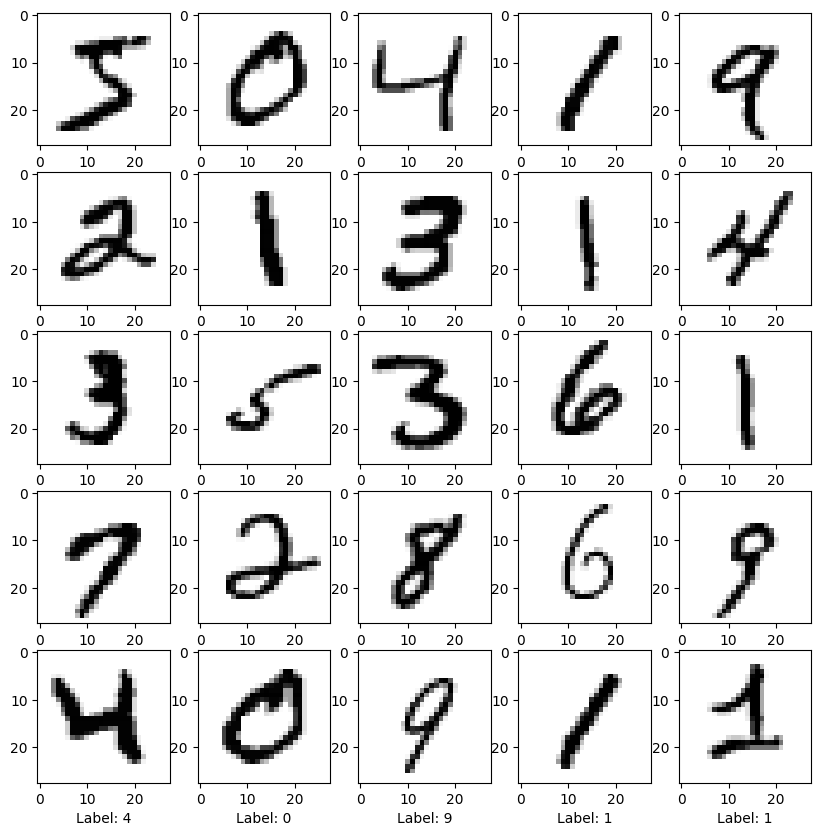

In [ ]:
import matplotlib.pyplot as plt

def display_images(images, labels, num_images):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        # plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(f"Label: {labels[i]}")
    plt.show()

# Display the first 25 images from the training set
display_images(x_train, y_train, num_images=25)

Sequential is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the Flatten, Dense, and Dropout layers.

-Flatten - Converts the 2D image data into a 1D array.

-Dense - Performs a linear transformation on the input data.

-Dropout - Reduces overfitting by randomly setting a fraction of input units to zero during training.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Logits (Raw Scores): If the model's final layer is a dense layer without an activation function (i.e., no softmax), the output will be logits. These are raw scores that can be positive or negative and don't sum to 1. They indicate the model's confidence before converting to probabilities.

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.25597468,  0.28228194, -0.5289077 ,  0.61307317,  0.05307158,
         0.45562607, -0.19717307, -0.17959821,  0.6114722 , -0.29708648]],
      dtype=float32)

The above code takes the first image from the training dataset x_train, feeds it into the model to make a prediction, and converts the output to a NumPy array. This can be used to inspect the model's predictions for the first training image.

The tf.nn.softmax function converts these logits to probabilities for each class:




tf.nn.softmax is a function in TensorFlow that applies the softmax activation to a set of values. Softmax converts the values (typically the raw output of a model's final layer, often called "logits") into probabilities that sum to 1.

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.06784879, 0.1162262 , 0.05164269, 0.1617949 , 0.09241856,
        0.13822494, 0.07195805, 0.07323387, 0.16153607, 0.06511597]],
      dtype=float32)

Define a loss function for training using losses.SparseCategoricalCrossentropy:

A loss function, also known as a cost function or objective function, is a mathematical function that measures the difference between the predicted output of a model and the actual target values.

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

- The from_logits=True argument tells the loss function that the model's outputs are logits.
- Logits are the raw, unnormalized outputs from the model's last layer, before any activation function (like softmax) has been applied.

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

1.9788729

Before you start training, configure and compile the model using Keras Model.compile. Set the optimizer class to adam, set the loss to the loss_fn function you defined earlier, and specify a metric to be evaluated for the model by setting the metrics parameter to accuracy.

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Adam adjusts the learning rate for each parameter individually, making it suitable for a wide range of problems and data.

Train and evaluate your model

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8590 - loss: 0.4846
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9536 - loss: 0.1556
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9654 - loss: 0.1113
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9728 - loss: 0.0882
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9772 - loss: 0.0731


The Model.evaluate method checks the model's performance, usually on a validation set or test set.

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9778 - loss: 0.0727


[0.0727391466498375, 0.9778000116348267]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted number: 5


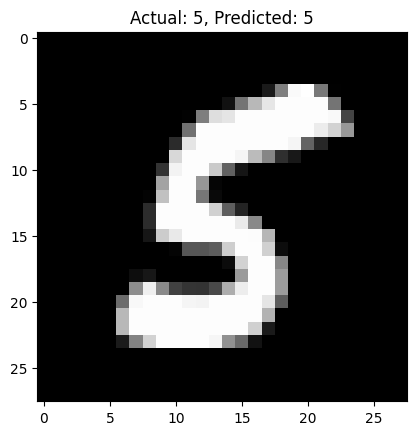

In [ ]:
# Pick a random image from the test set
random_index = np.random.randint(0, len(x_test))
random_image = x_test[random_index]

random_image = random_image.reshape((1, 28, 28, 1))

prediction = model.predict(random_image)

predicted_class = np.argmax(prediction)

print("Predicted number:", predicted_class)

plt.imshow(random_image[0, :, :, 0], cmap='gray')
# cmap is short for colormap, which defines the color scheme used to display the image.

plt.title(f"Actual: {y_test[random_index]}, Predicted: {predicted_class}")
plt.show()